In [14]:
!poetry add pyarrow
!poetry add seaborn

The following packages are already present in the pyproject.toml and will be skipped:

  - pyarrow

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.
The following packages are already present in the pyproject.toml and will be skipped:

  - seaborn

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as nsn

plt.style.use("ggplot")

## Problema

In [16]:
data_path = "/home/hasierza/datos_originales/"

Visualizar todos los .parquet

In [17]:
orders = pd.read_parquet(f"{data_path}/orders.parquet")
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB


In [18]:
orders.head()

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."


In [19]:
users = pd.read_parquet(f"{data_path}/users.parquet")
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB


In [20]:
users.dropna().head() #usamos el dropna para quitar los valores nulos

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
4751,09d70e0b0778117aec5550c08032d56f8e06f992741680...,Proposition,UKI,2021-06-28 12:07:04,2021-06-01 00:00:00,1.0,1.0,0.0,0.0,0.0
3154,4f5ff38ce5ed48096ba80dff80e167db1ad24b9ebdb00c...,Top Up,UKD,2020-06-12 12:07:35,2020-06-01 00:00:00,3.0,2.0,0.0,1.0,0.0
736,7b2ae50bb11646436fa613394fc3e71e1a0cdc3ba30cdb...,Proposition,UKF,2020-10-03 09:53:57,2020-10-01 00:00:00,2.0,2.0,0.0,0.0,2.0
4792,5e977a4aa2c57f306b8a22f92eaaa177f7dc31a52df82c...,Proposition,UKI,2021-10-14 10:41:13,2021-10-01 00:00:00,2.0,1.0,1.0,0.0,1.0
2217,eafb89ad33eb377adb98a915b6a5a65f1284c2db517d07...,Proposition,UKH,2022-01-20 15:53:09,2022-01-01 00:00:00,2.0,2.0,0.0,0.0,0.0


In [21]:
regulars = pd.read_parquet(f"{data_path}/regulars.parquet")
regulars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB


In [22]:
regulars.head()

,user_id,variant_id,created_at
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03
46,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35
47,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11


In [23]:
inventory = pd.read_parquet(f"{data_path}/inventory.parquet")
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


In [24]:
inventory.head()

,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]


In [25]:
abandoned_carts = pd.read_parquet(f"{data_path}/abandoned_carts.parquet")
abandoned_carts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB


In [26]:
abandoned_carts.head()

,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,"[33826459287684, 33826457616516, 3366719212762..."
13,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27 05:24:13,"[34415988179076, 34037940158596, 3450282236326..."
45,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18 08:23:49,"[34543001337988, 34037939372164, 3411360609088..."
50,20481783103620,10c42e10e530284b7c7c50f3a23a98726d5747b8128084...,2021-07-18 21:29:36,"[33667268116612, 34037940224132, 3443605520397..."
52,20485321687172,d9989439524b3f6fc4f41686d043f315fb408b954d6153...,2021-07-19 12:17:05,"[33667268083844, 34284950454404, 33973246886020]"


### Compradores

In [27]:
users.describe()

,count_people,count_adults,count_children,count_babies,count_pets
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,2.787692,2.003077,0.707692,0.076923,0.636923
std,1.365753,0.869577,1.026246,0.289086,0.995603
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,1.000000,0.000000,1.000000
max,8.000000,7.000000,6.000000,2.000000,6.000000


In [28]:
user_nuts_counts = users['user_nuts1'].value_counts()
user_nuts_percentage = (user_nuts_counts / len(users)) * 100

print(user_nuts_percentage) #de donde son los usuarios

user_nuts1
UKI    26.449930
UKJ    14.950833
UKK    12.081076
UKH     8.308248
UKD     7.184427
UKM     6.321493
UKE     6.080674
UKG     5.920128
UKF     5.057194
UKL     4.495284
UKC     2.046960
UKN     0.080273
Name: count, dtype: float64


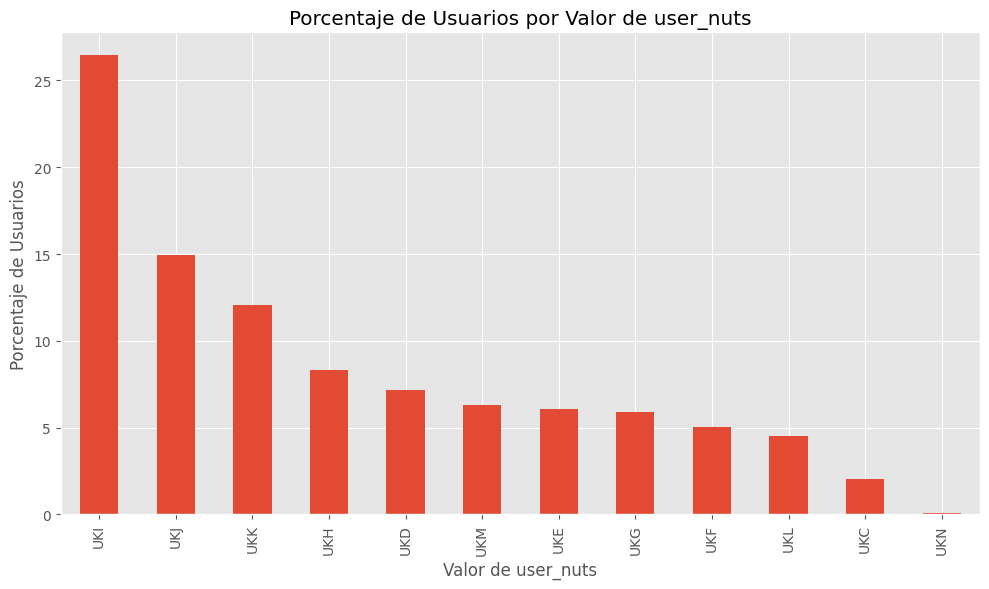

In [29]:
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la gráfica según sea necesario
user_nuts_percentage.plot(kind='bar')

plt.title('Porcentaje de Usuarios por Valor de user_nuts')
plt.xlabel('Valor de user_nuts')
plt.ylabel('Porcentaje de Usuarios')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [30]:
user_segment_counts = users['user_segment'].value_counts()
user_segment_percentage = (user_segment_counts / len(users)) * 100

print(user_segment_percentage) # Porcentaje de usuarios por segmento



user_segment
Top Up         53.040337
Proposition    46.959663
Name: count, dtype: float64


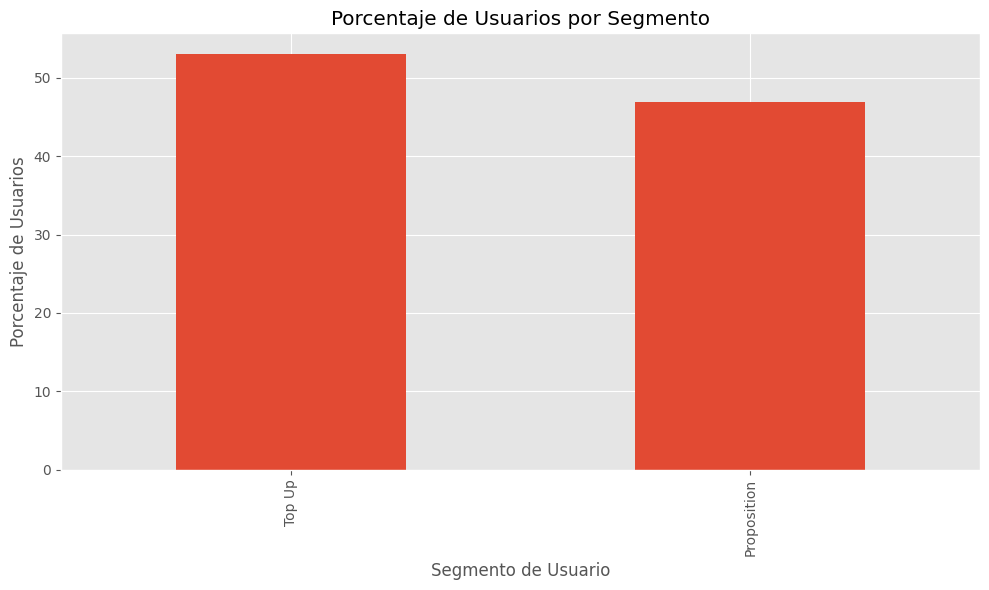

In [31]:
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la gráfica según sea necesario
user_segment_percentage.plot(kind='bar')

plt.title('Porcentaje de Usuarios por Segmento')
plt.xlabel('Segmento de Usuario')
plt.ylabel('Porcentaje de Usuarios')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [32]:
column_cleaned = users['count_pets'].dropna()

mascostas_no = (column_cleaned == 0).sum()
mascotas_si = (column_cleaned != 0).sum()

# Calcular el total de valores después de eliminar los valores NaN
total_values = column_cleaned.size

# Calcular el porcentaje de ocurrencia de cada valor
mascostas_no = (mascostas_no / total_values) * 100
mascotas_si = (mascotas_si / total_values) * 100

print(f'Porcentaje de usuarios q no tienen mascota: {mascostas_no:.2f}%')
print(f'Porcentaje de usuarios q si tiene mascota: {mascotas_si: .2f}%')



Porcentaje de usuarios q no tienen mascota: 59.38%
Porcentaje de usuarios q si tiene mascota:  40.62%


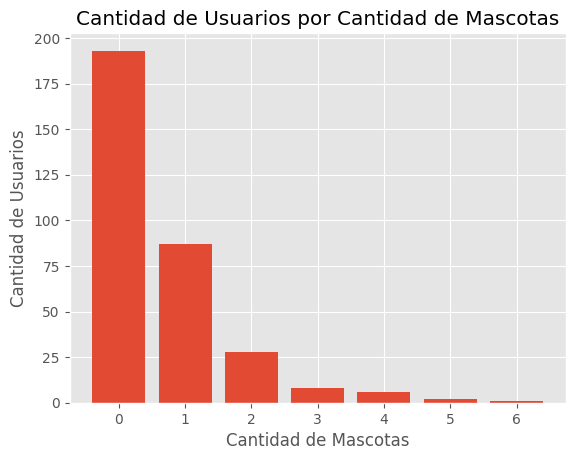

In [33]:
count_mascotas = column_cleaned.value_counts().sort_index()

# Crear la gráfica de barras
plt.bar(count_mascotas.index, count_mascotas.values)

# Configurar el título y las etiquetas de los ejes
plt.title('Cantidad de Usuarios por Cantidad de Mascotas')
plt.xlabel('Cantidad de Mascotas')
plt.ylabel('Cantidad de Usuarios')

# Mostrar la gráfica
plt.show()

hay q tener cuidado porque la muestra no es total solo se han tenido en cuenta valores n != nan

In [34]:
# Contar la cantidad de usuarios para cada cantidad de mascotas, incluyendo NaN
count_mascotas = users['count_pets'].value_counts(dropna=False).sort_index()

# Calcular el total de usuarios (incluyendo NaN)
total_users = count_mascotas.sum()

# Imprimir los resultados para cada cantidad de mascotas
for mascotas, count in count_mascotas.items():
    if pd.isna(mascotas):
        print(f'Porcentaje de usuarios que han puesto NaN: {(count / total_users) * 100:.2f}%')
    else:
        print(f'Porcentaje de usuarios que han puesto {int(mascotas)} mascotas: {(count / total_users) * 100:.2f}%')

Porcentaje de usuarios que han puesto 0 mascotas: 3.87%
Porcentaje de usuarios que han puesto 1 mascotas: 1.75%
Porcentaje de usuarios que han puesto 2 mascotas: 0.56%
Porcentaje de usuarios que han puesto 3 mascotas: 0.16%
Porcentaje de usuarios que han puesto 4 mascotas: 0.12%
Porcentaje de usuarios que han puesto 5 mascotas: 0.04%
Porcentaje de usuarios que han puesto 6 mascotas: 0.02%
Porcentaje de usuarios que han puesto NaN: 93.48%


como se puede ver la mayoria no han expecificado la respuesta y habria q entender el porque y si la muestra de sin nan es representativa o no.

In [35]:

data_cleaned = users.dropna(subset=['count_children', 'count_babies'])

no_children_or_babies = (data_cleaned['count_children'] == 0) & (data_cleaned['count_babies'] == 0)
count_no_children_or_babies = no_children_or_babies.sum()

print(f"Número de filas sin hijos ni bebés: {count_no_children_or_babies}")
num_rows_data_cleaned = data_cleaned.shape[0]
print(f"El DataFrame 'data_cleaned' tiene {num_rows_data_cleaned} filas.")
porcentaje= (count_no_children_or_babies / num_rows_data_cleaned) * 100
print(f"De la muestrad de 325 el {porcentaje:.2f} % no tienen hijos ni bebes")




Número de filas sin hijos ni bebés: 181
El DataFrame 'data_cleaned' tiene 325 filas.
De la muestrad de 325 el 55.69 % no tienen hijos ni bebes


In [36]:
users.dropna().head()




,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
4751,09d70e0b0778117aec5550c08032d56f8e06f992741680...,Proposition,UKI,2021-06-28 12:07:04,2021-06-01 00:00:00,1.0,1.0,0.0,0.0,0.0
3154,4f5ff38ce5ed48096ba80dff80e167db1ad24b9ebdb00c...,Top Up,UKD,2020-06-12 12:07:35,2020-06-01 00:00:00,3.0,2.0,0.0,1.0,0.0
736,7b2ae50bb11646436fa613394fc3e71e1a0cdc3ba30cdb...,Proposition,UKF,2020-10-03 09:53:57,2020-10-01 00:00:00,2.0,2.0,0.0,0.0,2.0
4792,5e977a4aa2c57f306b8a22f92eaaa177f7dc31a52df82c...,Proposition,UKI,2021-10-14 10:41:13,2021-10-01 00:00:00,2.0,1.0,1.0,0.0,1.0
2217,eafb89ad33eb377adb98a915b6a5a65f1284c2db517d07...,Proposition,UKH,2022-01-20 15:53:09,2022-01-01 00:00:00,2.0,2.0,0.0,0.0,0.0


In [37]:
users.describe()

,count_people,count_adults,count_children,count_babies,count_pets
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,2.787692,2.003077,0.707692,0.076923,0.636923
std,1.365753,0.869577,1.026246,0.289086,0.995603
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,1.000000,0.000000,1.000000
max,8.000000,7.000000,6.000000,2.000000,6.000000


hasta aqui lo he hecho por mi cuenta, lo siguinte mirando la explicacion de Guille

In [38]:
n_regulars = regulars.groupby('user_id')['variant_id'].nunique().reset_index().rename(columns={'variant_id': 'n_regulars'}) #nunique() devuelve el número de valores únicos. 
users = users.merge(n_regulars, on='user_id', how='left').fillna({'n_regulars':0})

In [39]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
 10  n_regulars             4983 non-null   float64
dtypes: float64(6), object(5)
memory usage: 428.4+ KB


In [40]:
users.dropna().head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,n_regulars
23,09d70e0b0778117aec5550c08032d56f8e06f992741680...,Proposition,UKI,2021-06-28 12:07:04,2021-06-01 00:00:00,1.0,1.0,0.0,0.0,0.0,0.0
27,4f5ff38ce5ed48096ba80dff80e167db1ad24b9ebdb00c...,Top Up,UKD,2020-06-12 12:07:35,2020-06-01 00:00:00,3.0,2.0,0.0,1.0,0.0,1.0
28,7b2ae50bb11646436fa613394fc3e71e1a0cdc3ba30cdb...,Proposition,UKF,2020-10-03 09:53:57,2020-10-01 00:00:00,2.0,2.0,0.0,0.0,2.0,25.0
35,5e977a4aa2c57f306b8a22f92eaaa177f7dc31a52df82c...,Proposition,UKI,2021-10-14 10:41:13,2021-10-01 00:00:00,2.0,1.0,1.0,0.0,1.0,72.0
66,eafb89ad33eb377adb98a915b6a5a65f1284c2db517d07...,Proposition,UKH,2022-01-20 15:53:09,2022-01-01 00:00:00,2.0,2.0,0.0,0.0,0.0,3.0


In [41]:
users.describe()

,count_people,count_adults,count_children,count_babies,count_pets,n_regulars
count,325.000000,325.000000,325.000000,325.000000,325.000000,4983.000000
mean,2.787692,2.003077,0.707692,0.076923,0.636923,2.481437
std,1.365753,0.869577,1.026246,0.289086,0.995603,8.890588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,1.000000,0.000000,1.000000,1.000000
max,8.000000,7.000000,6.000000,2.000000,6.000000,320.000000


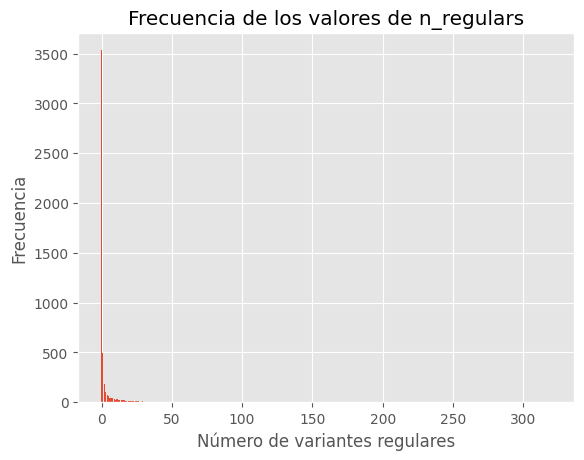

In [42]:
# Calcular la frecuencia de cada valor en la columna 'n_regulars'
frequencies = users['n_regulars'].value_counts()

# Ordenar las frecuencias por el valor de 'n_regulars' para asegurar un orden ascendente en el gráfico
frequencies = frequencies.sort_index()

# Crear el gráfico de barras
plt.bar(frequencies.index, frequencies.values)

# Etiquetas y título del gráfico
plt.xlabel('Número de variantes regulares')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los valores de n_regulars')

# Mostrar el gráfico
plt.show()

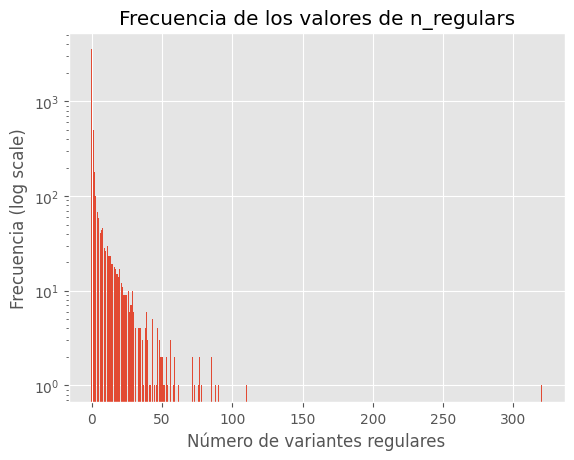

In [43]:
frequencies = users['n_regulars'].value_counts()

# Ordenar las frecuencias por el valor de 'n_regulars' para asegurar un orden ascendente en el gráfico
frequencies = frequencies.sort_index()

# Crear el gráfico de barras con escala logarítmica en el eje y
plt.bar(frequencies.index, frequencies.values)

# Aplicar escala logarítmica al eje y
plt.yscale('log')

# Etiquetas y título del gráfico
plt.xlabel('Número de variantes regulares')
plt.ylabel('Frecuencia (log scale)')
plt.title('Frecuencia de los valores de n_regulars')

# Mostrar el gráfico
plt.show()

se puede observar q lo normal es q este por debajo de 100 y q los otros valores son outlayers

In [44]:
# Definir los intervalos
intervalos = [(i, i+9) for i in range(0, 330, 10)]

# Inicializar un diccionario para almacenar la frecuencia de cada intervalo
frecuencias_intervalos = {intervalo: 0 for intervalo in intervalos}

# Contar la frecuencia de cada intervalo
for valor in users['n_regulars']:
    for intervalo in intervalos:
        if intervalo[0] <= valor <= intervalo[1]:
            frecuencias_intervalos[intervalo] += 1
            break

# Calcular el número total de registros
total_registros = len(users)

# Calcular los porcentajes
porcentajes = {f'{intervalo[0]}-{intervalo[1]}': (frecuencia / total_registros) * 100 for intervalo, frecuencia in frecuencias_intervalos.items()}

# Imprimir los porcentajes
for intervalo, porcentaje in porcentajes.items():
    print(f"Porcentaje de usuarios con {intervalo} productos: {porcentaje:.2f}%")


Porcentaje de usuarios con 0-9 productos: 92.21%
Porcentaje de usuarios con 10-19 productos: 4.09%
Porcentaje de usuarios con 20-29 productos: 2.01%
Porcentaje de usuarios con 30-39 productos: 0.72%
Porcentaje de usuarios con 40-49 productos: 0.42%
Porcentaje de usuarios con 50-59 productos: 0.26%
Porcentaje de usuarios con 60-69 productos: 0.02%
Porcentaje de usuarios con 70-79 productos: 0.14%
Porcentaje de usuarios con 80-89 productos: 0.06%
Porcentaje de usuarios con 90-99 productos: 0.02%
Porcentaje de usuarios con 100-109 productos: 0.00%
Porcentaje de usuarios con 110-119 productos: 0.02%
Porcentaje de usuarios con 120-129 productos: 0.00%
Porcentaje de usuarios con 130-139 productos: 0.00%
Porcentaje de usuarios con 140-149 productos: 0.00%
Porcentaje de usuarios con 150-159 productos: 0.00%
Porcentaje de usuarios con 160-169 productos: 0.00%
Porcentaje de usuarios con 170-179 productos: 0.00%
Porcentaje de usuarios con 180-189 productos: 0.00%
Porcentaje de usuarios con 190-19

In [45]:
# Definir los intervalos de 0 a 99 en intervalos de 10
intervalos_0_a_99 = [(i, i+9) for i in range(0, 100, 10)]

# Definir el intervalo para valores desde 100 hasta 330
intervalo_desde_100 = (100, 330)

# Combinar los intervalos
intervalos = intervalos_0_a_99 + [intervalo_desde_100]

# Inicializar un diccionario para almacenar la frecuencia de cada intervalo
frecuencias_intervalos = {intervalo: 0 for intervalo in intervalos}

# Contar la frecuencia de cada intervalo
for valor in users['n_regulars']:
    for intervalo in intervalos:
        if intervalo[0] <= valor <= intervalo[1]:
            frecuencias_intervalos[intervalo] += 1
            break

# Calcular el número total de registros
total_registros = len(users)

# Calcular los porcentajes
porcentajes = {f'{intervalo[0]}-{intervalo[1]}': (frecuencia / total_registros) * 100 for intervalo, frecuencia in frecuencias_intervalos.items()}

# Imprimir los porcentajes
for intervalo, porcentaje in porcentajes.items():
    print(f"Porcentaje de usuarios con {intervalo} productos: {porcentaje:.2f}%")




Porcentaje de usuarios con 0-9 productos: 92.21%
Porcentaje de usuarios con 10-19 productos: 4.09%
Porcentaje de usuarios con 20-29 productos: 2.01%
Porcentaje de usuarios con 30-39 productos: 0.72%
Porcentaje de usuarios con 40-49 productos: 0.42%
Porcentaje de usuarios con 50-59 productos: 0.26%
Porcentaje de usuarios con 60-69 productos: 0.02%
Porcentaje de usuarios con 70-79 productos: 0.14%
Porcentaje de usuarios con 80-89 productos: 0.06%
Porcentaje de usuarios con 90-99 productos: 0.02%
Porcentaje de usuarios con 100-330 productos: 0.04%


In [46]:
# Definir los intervalos de 0 a 9 en intervalos de 1
intervalos_0_a_9 = [(i, i) for i in range(0, 10, 1)]

# Definir los intervalos de 10 a 100 en intervalos de 25
intervalos_10_a_100 = [(i, i+24) for i in range(10, 101, 25)]

# Definir el intervalo para valores desde 101 hasta 330
intervalo_desde_101 = (101, 330)

# Combinar los intervalos
intervalos = intervalos_0_a_9 + intervalos_10_a_100 + [intervalo_desde_101]

# Inicializar un diccionario para almacenar la frecuencia de cada intervalo
frecuencias_intervalos = {intervalo: 0 for intervalo in intervalos}

# Contar la frecuencia de cada intervalo
for valor in users['n_regulars']:
    for intervalo in intervalos:
        if intervalo[0] <= valor <= intervalo[1]:
            frecuencias_intervalos[intervalo] += 1
            break

# Calcular el número total de registros
total_registros = len(users)

# Calcular los porcentajes
porcentajes = {f'{intervalo[0]}-{intervalo[1]}': (frecuencia / total_registros) * 100 for intervalo, frecuencia in frecuencias_intervalos.items()}

# Imprimir los porcentajes
for intervalo, porcentaje in porcentajes.items():
    print(f"Porcentaje de usuarios con {intervalo} productos: {porcentaje:.2f}%")


Porcentaje de usuarios con 0-0 productos: 70.94%
Porcentaje de usuarios con 1-1 productos: 9.93%
Porcentaje de usuarios con 2-2 productos: 3.59%
Porcentaje de usuarios con 3-3 productos: 2.03%
Porcentaje de usuarios con 4-4 productos: 1.36%
Porcentaje de usuarios con 5-5 productos: 1.16%
Porcentaje de usuarios con 6-6 productos: 0.82%
Porcentaje de usuarios con 7-7 productos: 0.88%
Porcentaje de usuarios con 8-8 productos: 0.92%
Porcentaje de usuarios con 9-9 productos: 0.56%
Porcentaje de usuarios con 10-34 productos: 6.46%
Porcentaje de usuarios con 35-59 productos: 1.04%
Porcentaje de usuarios con 60-84 productos: 0.16%
Porcentaje de usuarios con 85-109 productos: 0.08%
Porcentaje de usuarios con 101-330 productos: 0.04%


Text(0.5, 1.0, 'Average number of regulars per user segment')

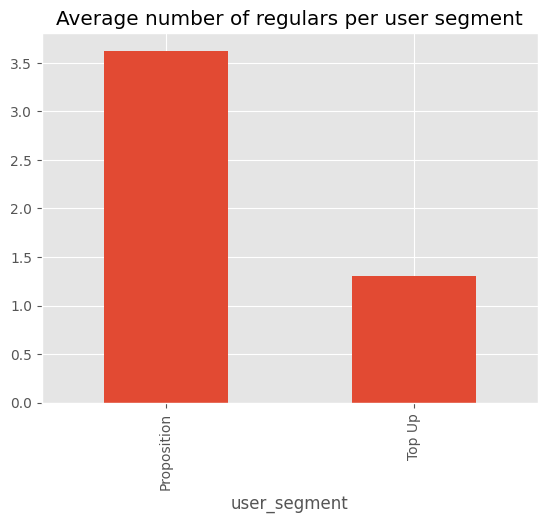

In [47]:
users.loc[lambda x: x.n_regulars < 100].groupby('user_segment')['n_regulars'].mean().plot(kind='bar') #groupby() agrupa los datos por la columna indicada. #mean() calcula la media de los valores agrupados. #plot() crea un gráfico. #kind='bar' indica que el gráfico es de barras.
plt.title('Average number of regulars per user segment') 

<Axes: xlabel='user_nuts1'>

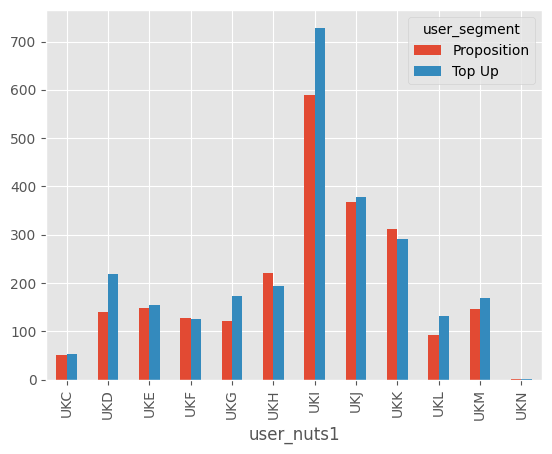

In [48]:
pd.crosstab(users['user_nuts1'],users['user_segment']).plot(kind='bar')

### Insigths:
1. Tenemos muchos valores nan en las columnas de count, hay q preguntar el porque y entenderlo para saber si la muestra de los no nan es representativa
2. Mas del %50 son de estos tres nuts UKI   UKJ    UKK
3. De la muestra de 325 con valores no nan
    1. El porcentaje de usuarios q no tienen mascota es de %59
    2. El porcentaje de usuarios q no tienen children ni babies es de %55.69
    3. Estos datos pueden ser interesants pare conocer al usuario q nos compra
4. El porcentaje de usuarios q guardan de 0-9 prodcusos es del %92 y que guardan 0 productos es de %71
5. Hay diferencia entre los proposition y los top up en cuanto los productos guardados
6. Los diferentes nuts guardan similitud entre top up y proposition



## Understanding regulars products

In [49]:
# Contar la cantidad de productos por tipo de producto
productos_por_tipo = inventory['product_type'].value_counts()

# Mostrar los resultados
print(productos_por_tipo)


product_type
cleaning-products                  160
tins-packaged-foods                125
snacks-confectionery               122
cooking-ingredients                 73
pasta-rice-noodles                  66
baby-toddler-food                   62
condiments-dressings                52
cereal                              51
haircare                            50
biscuits-crackers                   49
soft-drinks-mixers                  48
baby-kids-toiletries                45
skincare                            44
cooking-sauces                      43
dog-food                            42
dental                              42
baby-accessories                    41
superfoods-supplements              37
cat-food                            35
shaving-grooming                    29
nappies-nappy-pants                 29
dishwashing                         27
period-care                         26
home-baking                         25
hand-soap-sanitisers                24
long-life-mi

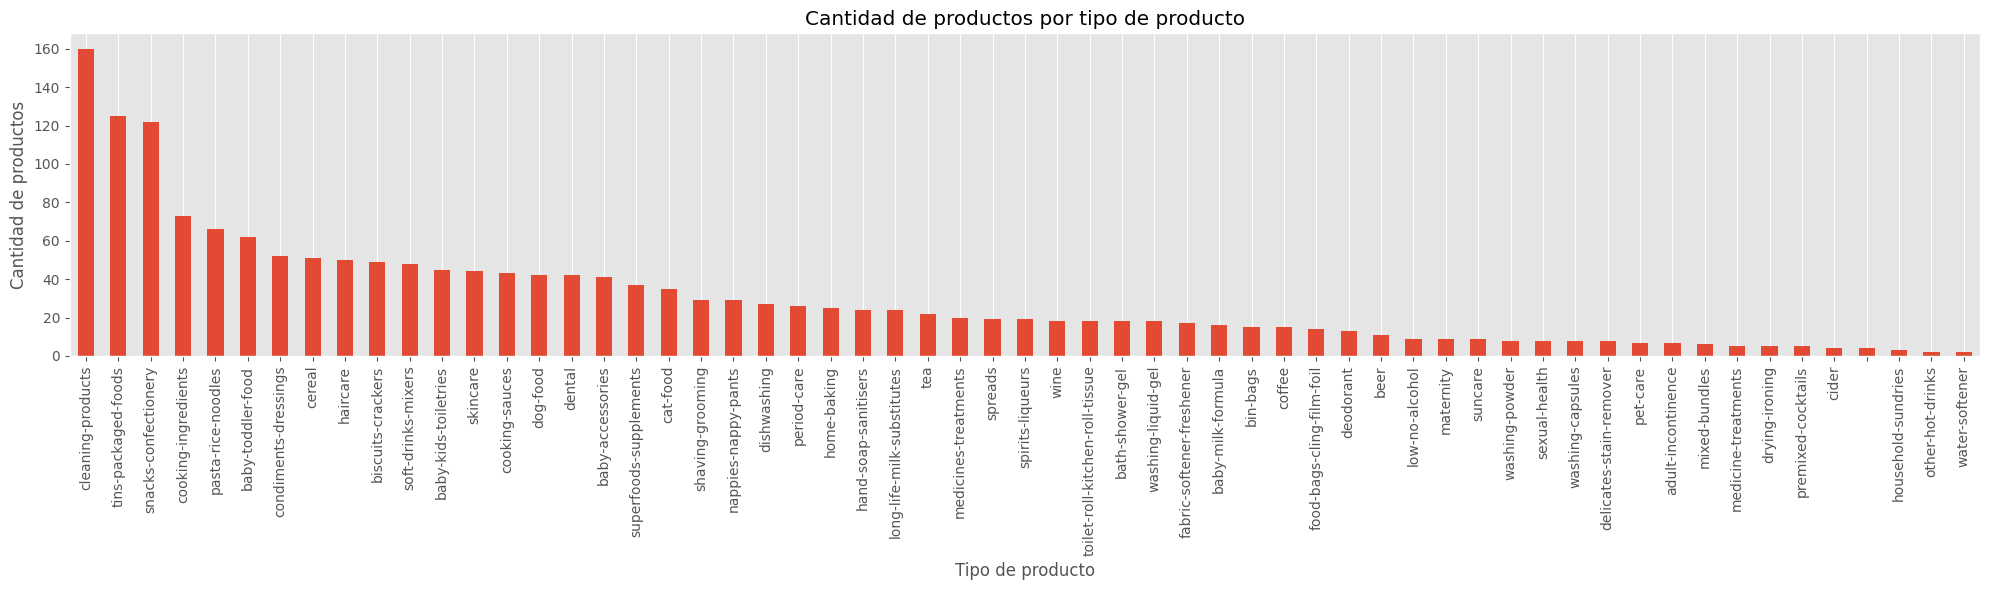

In [50]:
productos_por_tipo = inventory['product_type'].value_counts().head(100)
plt.figure(figsize=(20, 6))  # Ajusta el tamaño del gráfico según tus preferencias
productos_por_tipo.plot(kind='bar')
plt.xlabel('Tipo de producto')
plt.ylabel('Cantidad de productos')
plt.title('Cantidad de productos por tipo de producto')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.grid(axis='y')  # Agregar una cuadrícula en el eje y
plt.tight_layout()  # Ajustar el diseño para evitar recortes
plt.show()

In [51]:
# Calcular el total de productos en el DataFrame
total_productos = len(inventory)

# Contar la cantidad de productos por tipo de producto y seleccionar las primeras 10
productos_por_tipo = inventory['product_type'].value_counts().head(10)

# Calcular los porcentajes para las primeras 5 categorías
porcentajes = (productos_por_tipo / total_productos) * 100

# Imprimir los porcentajes
for tipo, porcentaje in porcentajes.items():
    print(f"Porcentaje de productos para '{tipo}': {porcentaje:.2f}%")


Porcentaje de productos para 'cleaning-products': 9.23%
Porcentaje de productos para 'tins-packaged-foods': 7.21%
Porcentaje de productos para 'snacks-confectionery': 7.04%
Porcentaje de productos para 'cooking-ingredients': 4.21%
Porcentaje de productos para 'pasta-rice-noodles': 3.81%
Porcentaje de productos para 'baby-toddler-food': 3.58%
Porcentaje de productos para 'condiments-dressings': 3.00%
Porcentaje de productos para 'cereal': 2.94%
Porcentaje de productos para 'haircare': 2.89%
Porcentaje de productos para 'biscuits-crackers': 2.83%


para ver q tipos de productos tenemos.

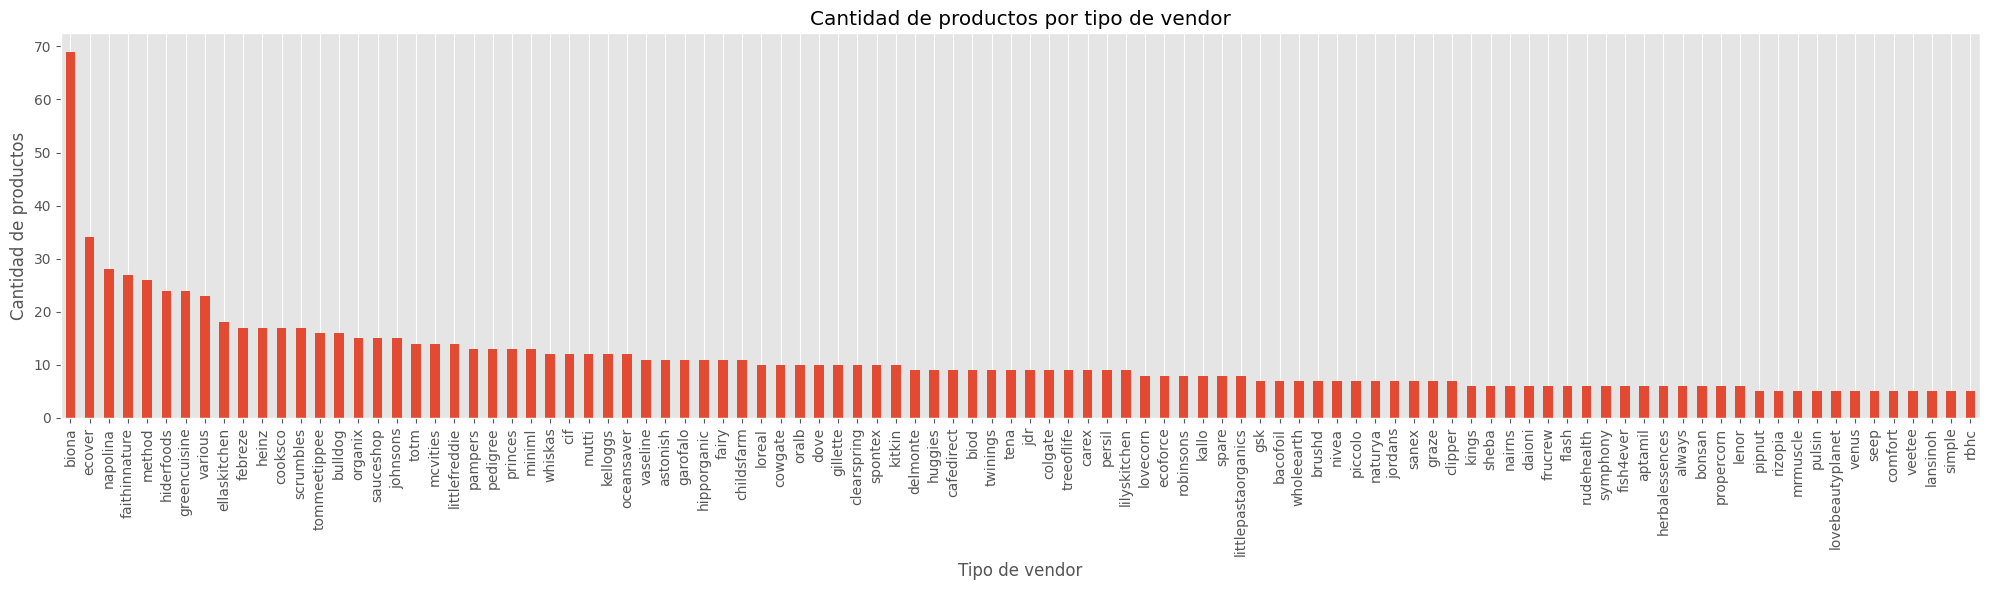

In [52]:
productos_por_vendor = inventory['vendor'].value_counts().head(100)
plt.figure(figsize=(20, 6))  # Ajusta el tamaño del gráfico según tus preferencias
productos_por_vendor.plot(kind='bar')
plt.xlabel('Tipo de vendor')
plt.ylabel('Cantidad de productos')
plt.title('Cantidad de productos por tipo de vendor')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.grid(axis='y')  # Agregar una cuadrícula en el eje y
plt.tight_layout()  # Ajustar el diseño para evitar recortes
plt.show()

In [53]:
# Calcular el total de productos en el DataFrame
total_productos = len(inventory)

# Contar la cantidad de productos por tipo de vednor y seleccionar las primeras 10
vendor_type = inventory['vendor'].value_counts().head(10)

# Calcular los porcentajes para las primeras 5 categorías
porcentajes = (vendor_type / total_productos) * 100
i=1
# Imprimir los porcentajes
for tipo, porcentaje in porcentajes.items():
    print(f"{i} Porcentaje de vendor  para '{tipo}': {porcentaje:.2f}%")
    i=i+1

1 Porcentaje de vendor  para 'biona': 3.98%
2 Porcentaje de vendor  para 'ecover': 1.96%
3 Porcentaje de vendor  para 'napolina': 1.62%
4 Porcentaje de vendor  para 'faithinnature': 1.56%
5 Porcentaje de vendor  para 'method': 1.50%
6 Porcentaje de vendor  para 'hiderfoods': 1.38%
7 Porcentaje de vendor  para 'greencuisine': 1.38%
8 Porcentaje de vendor  para 'various': 1.33%
9 Porcentaje de vendor  para 'ellaskitchen': 1.04%
10 Porcentaje de vendor  para 'febreze': 0.98%


hasta aqui hecho pormi, apartir de ahora despues de ver video

In [54]:
regulars_df = regulars.merge(inventory, on='variant_id', how= 'left')

In [55]:
regulars_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18105 entries, 0 to 18104
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           18105 non-null  object        
 1   variant_id        18105 non-null  int64         
 2   created_at        18105 non-null  datetime64[us]
 3   price             15034 non-null  float64       
 4   compare_at_price  15034 non-null  float64       
 5   vendor            15034 non-null  object        
 6   product_type      15034 non-null  object        
 7   tags              15034 non-null  object        
dtypes: datetime64[us](1), float64(2), int64(1), object(4)
memory usage: 1.1+ MB


In [56]:
regulars_df.head()

,user_id,variant_id,created_at,price,compare_at_price,vendor,product_type,tags
0,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03,NaN,NaN,NaN,NaN,NaN
1,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35,NaN,NaN,NaN,NaN,NaN
2,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03,NaN,NaN,NaN,NaN,NaN
3,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35,NaN,NaN,NaN,NaN,NaN
4,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11,3.49,3.5,method,cleaning-products,"[cruelty-free, eco, vegan, window-glass-cleaner]"


In [57]:
clean_regulars = regulars_df.dropna() 

In [58]:
clean_regulars.head()

,user_id,variant_id,created_at,price,compare_at_price,vendor,product_type,tags
4,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11,3.49,3.50,method,cleaning-products,"[cruelty-free, eco, vegan, window-glass-cleaner]"
8,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667182493828,2020-05-06 14:42:11,4.29,5.40,bulldog,skincare,"[cruelty-free, eco, facial-skincare, vegan]"
17,d883991facbc3b07b62da342d00c97d1e6cea8d2176695...,33667198910596,2020-07-06 10:12:08,14.99,16.55,ecover,dishwashing,"[cruelty-free, dishwasher-tablets, eco, vegan]"
18,66a195720d6988ff4d32155cc03631b84f68b34d3b0a1e...,33826459320452,2020-07-06 17:17:52,5.09,5.65,treeoflife,snacks-confectionery,"[christmas, nuts-dried-fruit-seeds, organic]"
19,0b7e02fee4b9e215da3bdae70050f20c5ffd18264454a5...,33667247276164,2020-07-18 16:56:55,2.49,3.00,method,hand-soap-sanitisers,"[cruelty-free, eco, hand-soap, vegan]"


<Axes: xlabel='variant_id'>

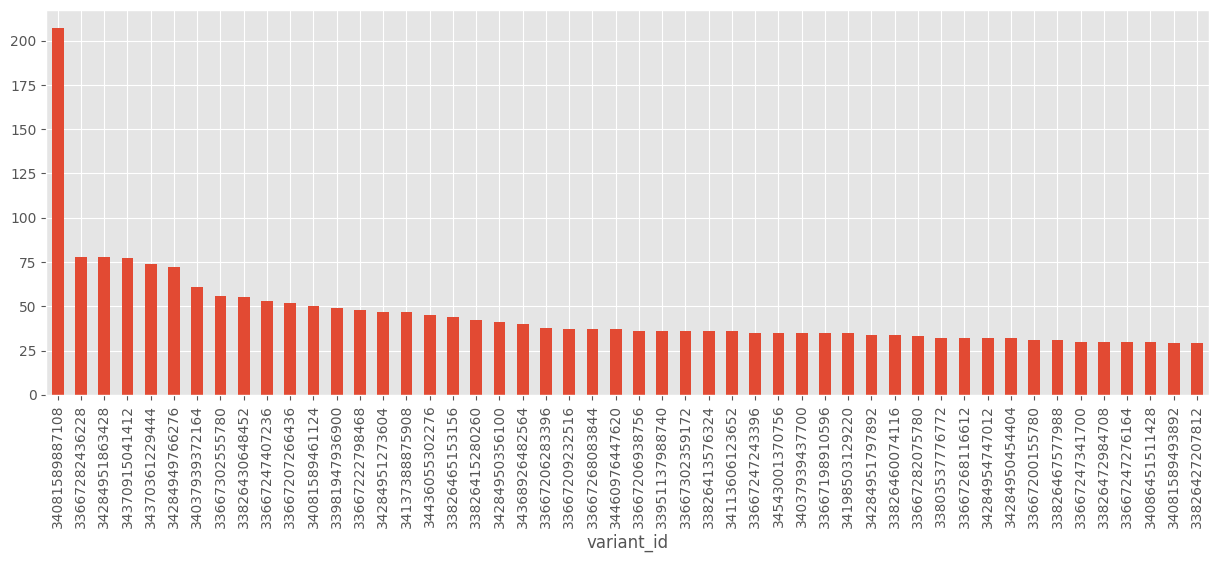

In [59]:
clean_regulars.groupby(['variant_id'])['user_id'].nunique().sort_values(ascending=False).head(50).plot(kind='bar', figsize=(15,5))
#cuantos usuarios han guardado cada producto.

In [60]:
maximo_valor = clean_regulars['variant_id'].max()
top_product = clean_regulars.groupby(['variant_id'])['user_id'].nunique().sort_values(ascending=False).head(1).index[0]
clean_regulars.loc[lambda x: x.variant_id == top_product][['variant_id', 'price','product_type','vendor'  ]].drop_duplicates()

,variant_id,price,product_type,vendor
95,34081589887108,10.79,long-life-milk-substitutes,oatly


In [61]:
print("Fila completa:")
print(clean_regulars.loc[95])


Fila completa:
user_id             1e49bd8004043d757673793e7d5ea394b4eca7f852b179...
variant_id                                             34081589887108
created_at                                        2021-01-13 06:12:03
price                                                           10.79
compare_at_price                                                11.94
vendor                                                          oatly
product_type                               long-life-milk-substitutes
tags                                                [oat-milk, vegan]
Name: 95, dtype: object


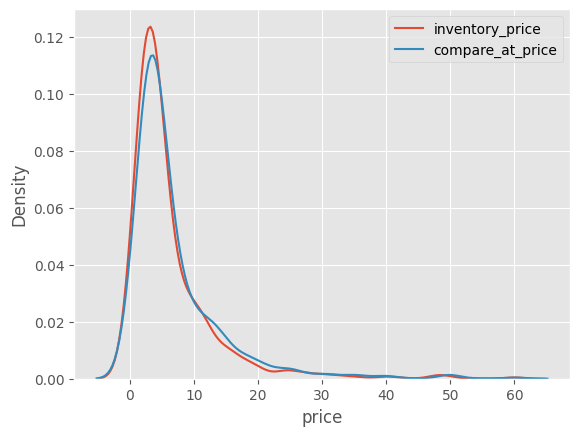

In [62]:
nsn.kdeplot(inventory.price, label = 'inventory_price')
nsn.kdeplot(inventory.compare_at_price , label = 'compare_at_price')
plt.legend()

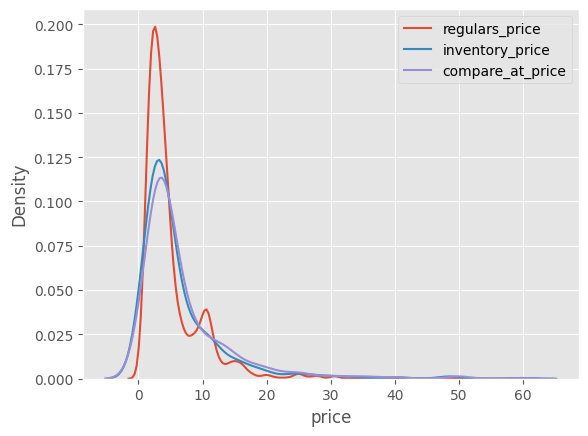

In [63]:
nsn.kdeplot(clean_regulars.price, label = 'regulars_price')
nsn.kdeplot(inventory.price, label = 'inventory_price')
nsn.kdeplot(inventory.compare_at_price , label = 'compare_at_price')
plt.legend()

Text(0.5, 1.0, 'Top 100 vendors by regular number of regulars (out of367vendors)')

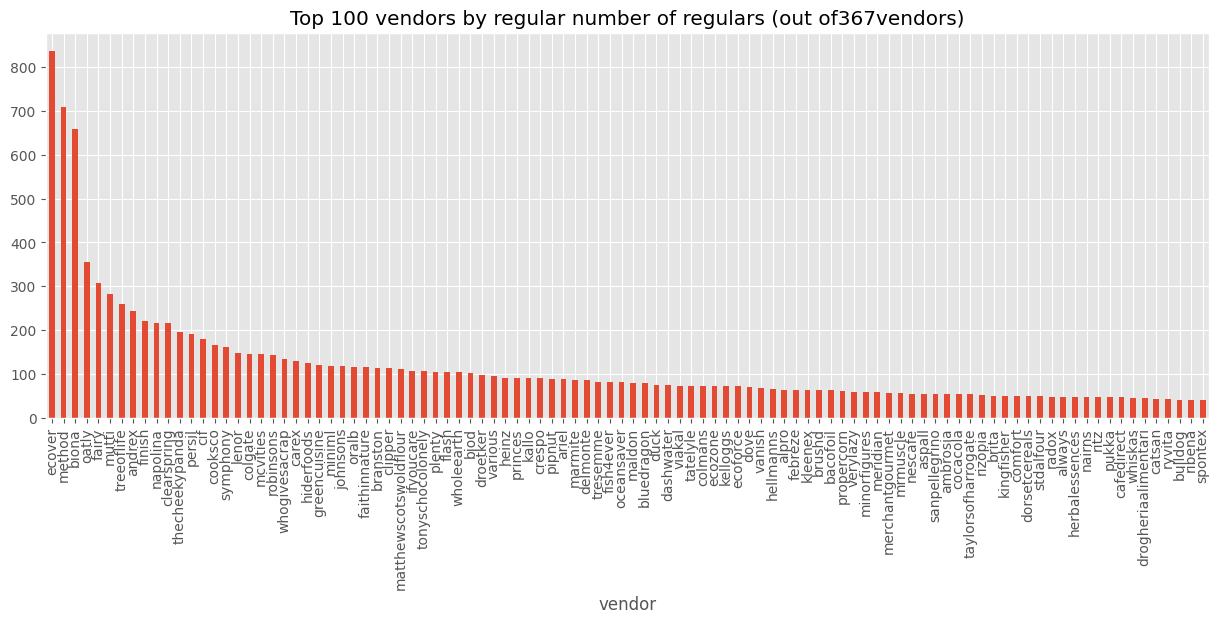

In [64]:
clean_regulars['vendor'].value_counts().head(100).plot(kind= 'bar', figsize=(15,5))
plt.title(f"Top 100 vendors by regular number of regulars (out of{clean_regulars.vendor.nunique()}vendors)")

Text(0.5, 1.0, 'Top 50 product_type by number of regulars (out of58) product types')

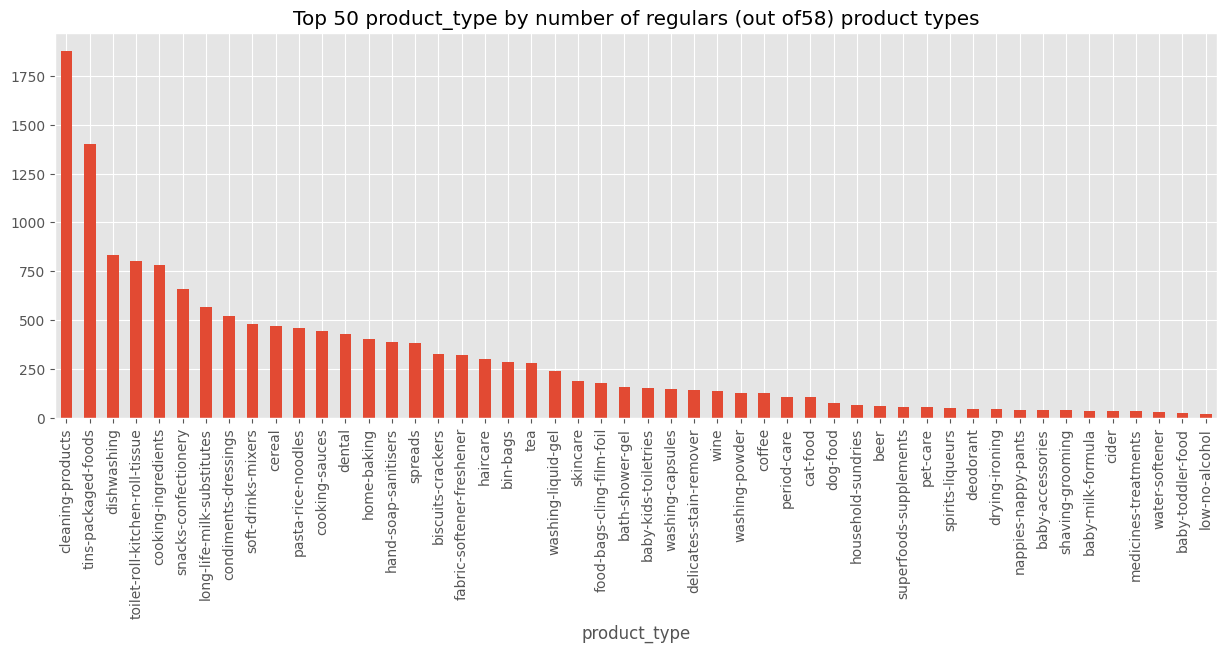

In [65]:
clean_regulars['product_type'].value_counts().head(50).plot(kind='bar',figsize=(15,5))
plt.title(f'Top 50 product_type by number of regulars (out of{clean_regulars.product_type.nunique()}) product types')

In [66]:
diff_prevalance = (
    inventory['product_type'].value_counts(normalize=True).rename('inventory_count').reset_index().merge(
        clean_regulars['product_type'].value_counts(normalize=True).rename('regulars_count').reset_index()
    )
    .assign(inventory_rank=lambda x: x.inventory_count.rank(ascending=False))
    .assign(regulars_rank=lambda x: x.regulars_count.rank(ascending=False))
    .assign(diff=lambda x: x.inventory_count - x.regulars_count)

)

In [67]:
diff_prevalance.sort_values('regulars_count', ascending=False).head(10)

,product_type,inventory_count,regulars_count,inventory_rank,regulars_rank,diff
0,cleaning-products,0.092325,0.124850,1.0,1.0,-0.032525
1,tins-packaged-foods,0.072129,0.093255,2.0,2.0,-0.021126
21,dishwashing,0.015580,0.055474,22.0,3.0,-0.039894
31,toilet-roll-kitchen-roll-tissue,0.010387,0.053346,32.5,4.0,-0.042959
3,cooking-ingredients,0.042123,0.052148,4.0,5.0,-0.010025
2,snacks-confectionery,0.070398,0.043900,3.0,6.0,0.026498
25,long-life-milk-substitutes,0.013849,0.037648,25.5,7.0,-0.023799
6,condiments-dressings,0.030006,0.034655,7.0,8.0,-0.004649
10,soft-drinks-mixers,0.027698,0.032061,11.0,9.0,-0.004363
7,cereal,0.029429,0.031329,8.0,10.0,-0.001900


### Insigths
1. Hay muchos tipos de productos diferentes  en el inventory y disteca los cleaning products
2. Tenemos muchos tipos de vendor pero destaca "biona" q hay el doble q el segundo pero porcentualmenta tampoco es tan importante
3. Hay un prodcuto q se guarda mucho  el oatly
4. Lo q mas se guarda por los clientes es lo mas suele aber en el inventario pero hay algunos q no siguen esta regla. Esto casos habria q estudiarlos y entender el porque. Puede ser a causa de los precios o por el tipo de cliente/consumidor q hay
5. Destacan los producto de limpieza y ecologicos o bio


## Orders

In [68]:
orders.head(10)

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."
51,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,"[33667168796804, 33667178594436, 3366720605402..."
53,2219446730884,7ce6569d75a8bc75b72516e059edecb0bc2245750bfa68...,2020-05-04 23:57:21,2020-05-04,1,"[33667178594436, 33667184492676, 3366721657254..."
61,2222574076036,f4f0753d9919c6d39afc6b1d797a34e31224698d5d92a5...,2020-05-05 21:09:55,2020-05-05,1,"[33667168829572, 33667195437188, 3366721860416..."
68,2224066986116,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,2020-05-06 10:23:11,2020-05-06,1,"[33667171221636, 33667177382020, 3366717856166..."
70,2224765862020,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,2020-05-06 16:03:35,2020-05-06,1,"[33667174695044, 33667203596420, 3366720589018..."


In [69]:
um_valores_unicos = orders['id'].nunique()
longitud_columna = len(orders['id'])
print(f'Número de valores únicos en la columna "id": {um_valores_unicos} y longitud de la columna: {longitud_columna}')


Número de valores únicos en la columna "id": 8773 y longitud de la columna: 8773


In [70]:
from collections import defaultdict

# Inicializar un diccionario para mantener el recuento de órdenes por cantidad de items
orders_por_items = defaultdict(int)

# Iterar sobre cada fila del DataFrame
for items_lista in orders['ordered_items']:
    # Contar la cantidad de items en la lista actual
    cantidad_items = len(items_lista)
    # Incrementar el contador correspondiente
    orders_por_items[cantidad_items] += 1

# Ordenar el diccionario por clave (cantidad de items) en orden ascendente
orders_por_items_ordenado = dict(sorted(orders_por_items.items()))

# Imprimir el resultado
for cantidad_items, cantidad_ordenes in orders_por_items_ordenado.items():
    print(f"Se han realizado {cantidad_ordenes} órdenes con {cantidad_items} items.")

Se han realizado 6 órdenes con 1 items.
Se han realizado 54 órdenes con 2 items.
Se han realizado 82 órdenes con 3 items.
Se han realizado 349 órdenes con 4 items.
Se han realizado 510 órdenes con 5 items.
Se han realizado 591 órdenes con 6 items.
Se han realizado 591 órdenes con 7 items.
Se han realizado 589 órdenes con 8 items.
Se han realizado 599 órdenes con 9 items.
Se han realizado 617 órdenes con 10 items.
Se han realizado 600 órdenes con 11 items.
Se han realizado 561 órdenes con 12 items.
Se han realizado 532 órdenes con 13 items.
Se han realizado 485 órdenes con 14 items.
Se han realizado 461 órdenes con 15 items.
Se han realizado 369 órdenes con 16 items.
Se han realizado 291 órdenes con 17 items.
Se han realizado 264 órdenes con 18 items.
Se han realizado 215 órdenes con 19 items.
Se han realizado 171 órdenes con 20 items.
Se han realizado 147 órdenes con 21 items.
Se han realizado 101 órdenes con 22 items.
Se han realizado 101 órdenes con 23 items.
Se han realizado 79 órde

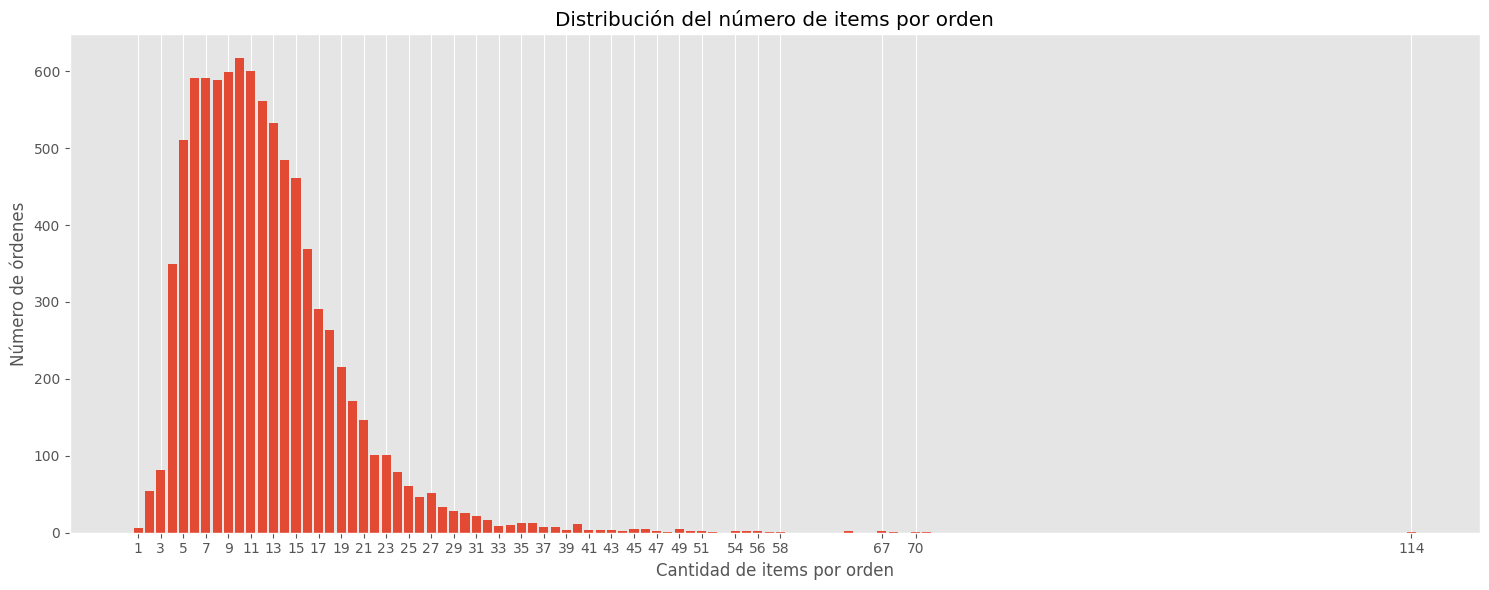

In [71]:
cantidad_items = list(orders_por_items_ordenado.keys())
cantidad_ordenes = list(orders_por_items_ordenado.values())

# Crear el gráfico de barras
plt.figure(figsize=(15, 6))  # Ajusta el tamaño del gráfico según tus preferencias
plt.bar(cantidad_items, cantidad_ordenes)
plt.xlabel('Cantidad de items por orden')
plt.ylabel('Número de órdenes')
plt.title('Distribución del número de items por orden')
plt.xticks(cantidad_items[::2]) 
plt.grid(axis='y')  # Agregar una cuadrícula en el eje y
plt.tight_layout()  # Ajustar el diseño para evitar recortes
plt.show()

In [72]:
print(orders.dtypes)


id                         int64
user_id                   object
created_at        datetime64[us]
order_date        datetime64[us]
user_order_seq             int64
ordered_items             object
dtype: object


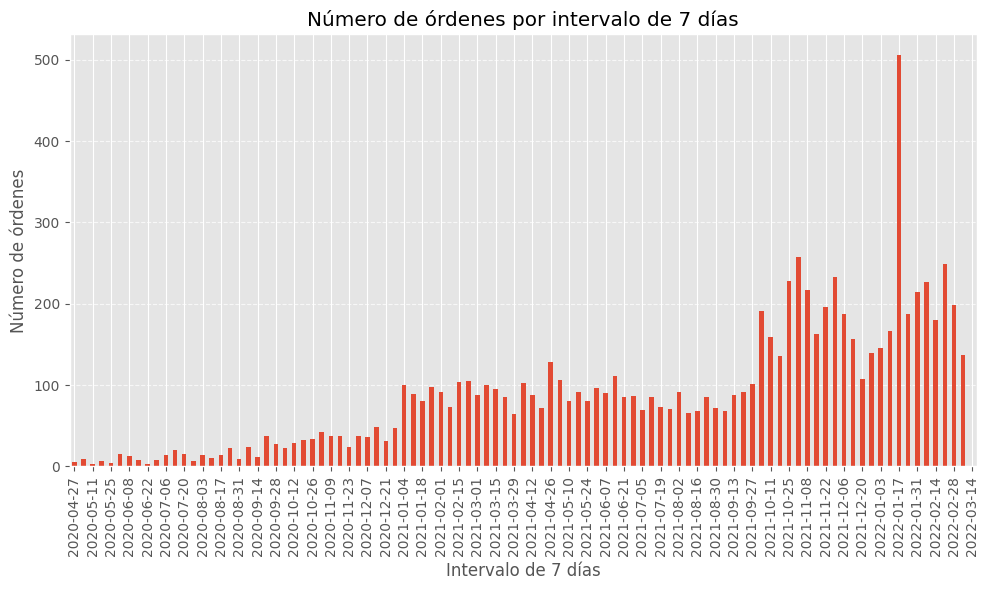

In [73]:
# Redondea las fechas al inicio de cada intervalo de 7 días
orders['intervalo'] = orders['order_date'] - pd.to_timedelta(orders['order_date'].dt.dayofweek, unit='D')

# Contar el número de órdenes en cada intervalo de 7 días
orders_por_intervalo = orders.groupby('intervalo').size()

# Graficar los resultados
plt.figure(figsize=(10, 6))
orders_por_intervalo.plot(kind='bar')
plt.title('Número de órdenes por intervalo de 7 días')
plt.xlabel('Intervalo de 7 días')
plt.ylabel('Número de órdenes')
plt.xticks(range(0, len(orders_por_intervalo), 2), orders_por_intervalo.index[::2].strftime('%Y-%m-%d'), rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [74]:
# Extraer la hora de cada timestamp de orden
orders['hora'] = orders['created_at'].dt.hour

# Contar el número de órdenes en cada hora del día
orders_por_hora = orders.groupby('hora').size()


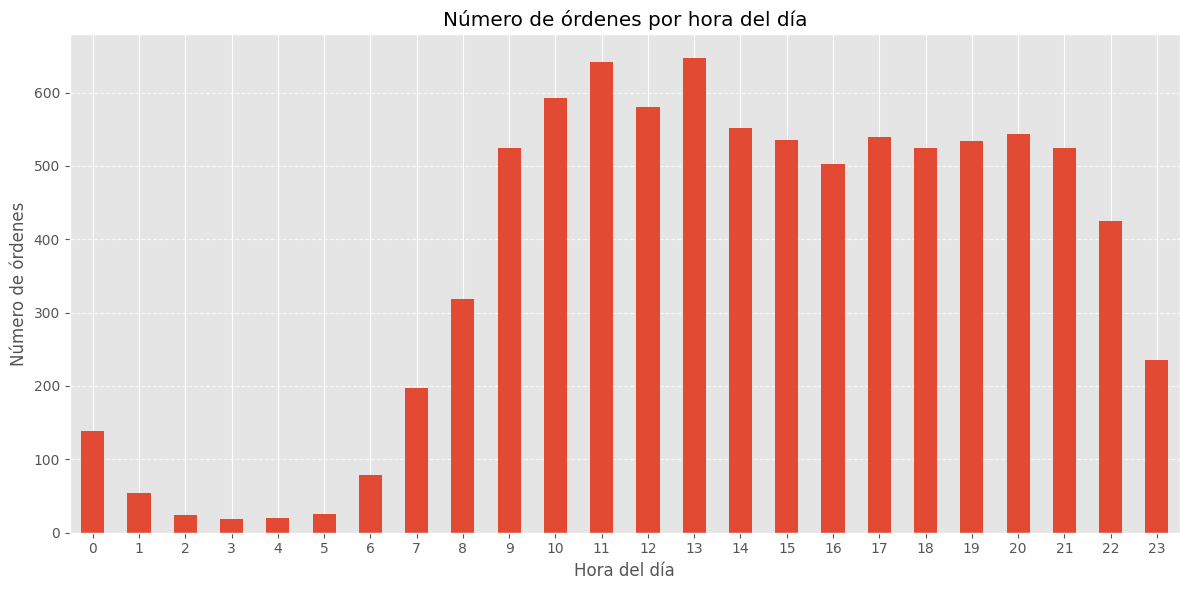

In [75]:
# Graficar los resultados
plt.figure(figsize=(12, 6))
orders_por_hora.plot(kind='bar')
plt.title('Número de órdenes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de órdenes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

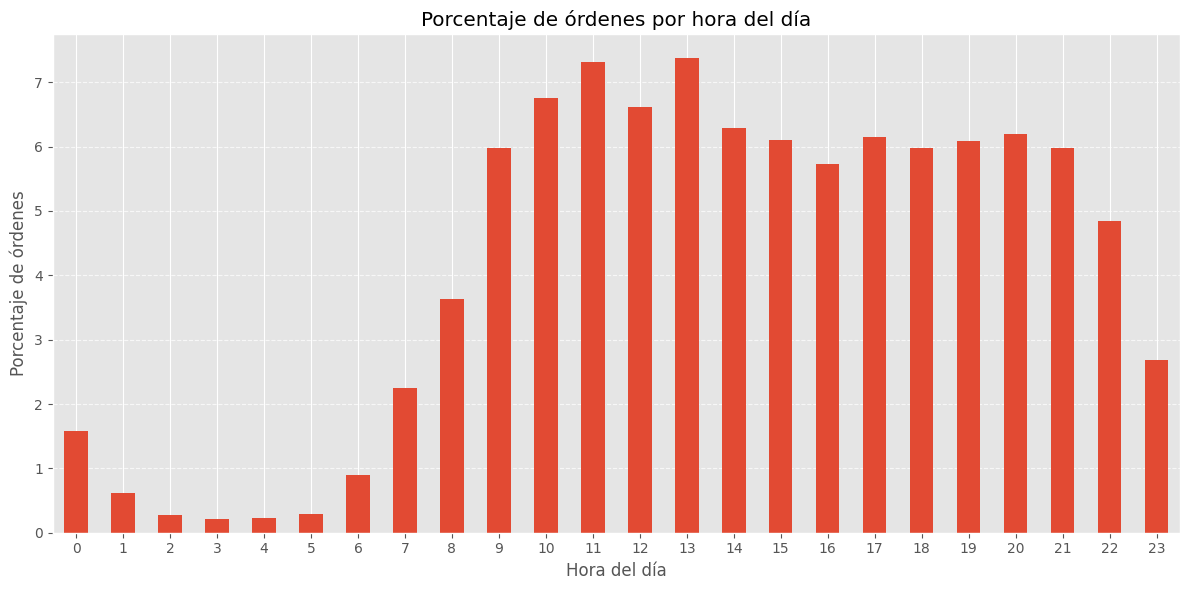

In [76]:
# Calcular el total de órdenes
total_ordenes = len(orders)

# Calcular el porcentaje de órdenes en cada hora del día
porcentaje_ordenes_por_hora = (orders_por_hora / total_ordenes) * 100

# Graficar los resultados
plt.figure(figsize=(12, 6))
porcentaje_ordenes_por_hora.plot(kind='bar')
plt.title('Porcentaje de órdenes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Porcentaje de órdenes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [77]:
ordered_items_primera_fila = orders.iloc[0]['ordered_items']
print(ordered_items_primera_fila)




[33618849693828 33618860179588 33618874040452 33618907005060
 33618907005060 33618923061380 33618937544836 33618956746884
 33618956746884 33618967036036 33618967560324 33618979389572
 33618981421188 33618997379204]


In [78]:
def contar_items(array):
    return len(array)

# Calcular el número de ítems en cada orden
orders['cantidad'] = orders['ordered_items'].apply(contar_items)

In [79]:
orders.head(20)

,id,user_id,created_at,order_date,user_order_seq,ordered_items,intervalo,hora,cantidad
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045...",2020-04-27,14,14
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058...",2020-04-27,17,25
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618...",2020-04-27,18,15
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624...",2020-04-27,19,10
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163...",2020-04-27,21,10
51,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,"[33667168796804, 33667178594436, 3366720605402...",2020-05-04,11,8
53,2219446730884,7ce6569d75a8bc75b72516e059edecb0bc2245750bfa68...,2020-05-04 23:57:21,2020-05-04,1,"[33667178594436, 33667184492676, 3366721657254...",2020-05-04,23,9
61,2222574076036,f4f0753d9919c6d39afc6b1d797a34e31224698d5d92a5...,2020-05-05 21:09:55,2020-05-05,1,"[33667168829572, 33667195437188, 3366721860416...",2020-05-04,21,11
68,2224066986116,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,2020-05-06 10:23:11,2020-05-06,1,"[33667171221636, 33667177382020, 3366717856166...",2020-05-04,10,15
70,2224765862020,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,2020-05-06 16:03:35,2020-05-06,1,"[33667174695044, 33667203596420, 3366720589018...",2020-05-04,16,6


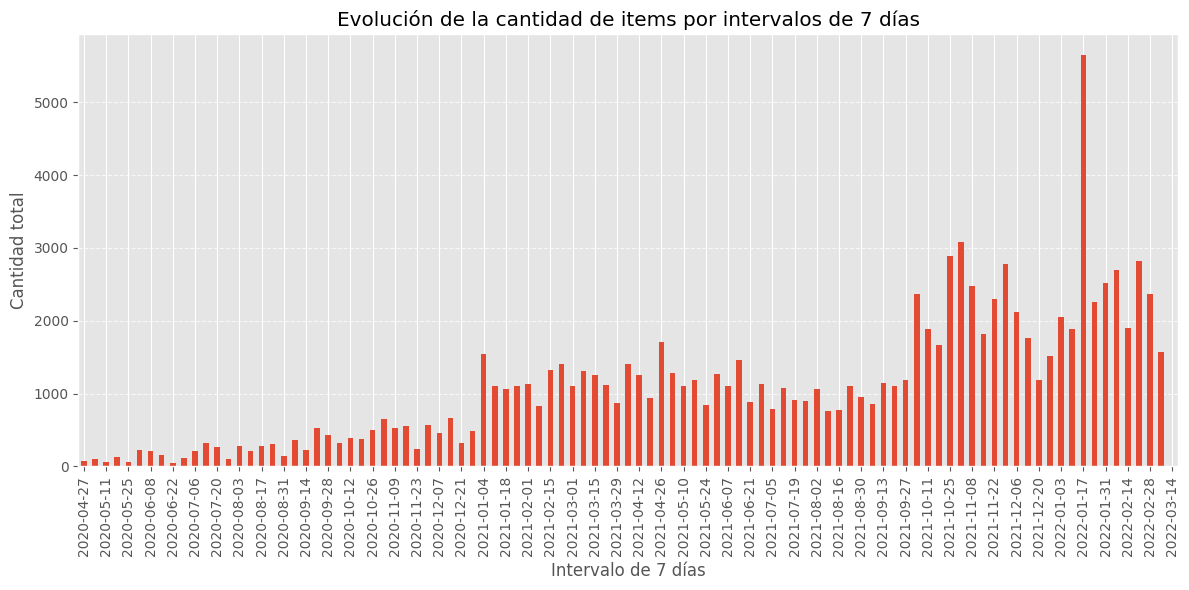

In [80]:
# Redondear las fechas al inicio de cada intervalo de 7 días
orders['intervalo'] = orders['order_date'] - pd.to_timedelta(orders['order_date'].dt.dayofweek % 7, unit='D')

# Agrupar por intervalo de 7 días y sumar la cantidad en cada intervalo
cantidad_por_intervalo = orders.groupby('intervalo')['cantidad'].sum()

# Graficar la evolución de la cantidad por intervalo de 7 días
plt.figure(figsize=(12, 6))
cantidad_por_intervalo.plot(kind='bar')

plt.title('Evolución de la cantidad de items por intervalos de 7 días')
plt.xlabel('Intervalo de 7 días')
plt.ylabel('Cantidad total')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Obtener las etiquetas y valores del eje x
etiquetas = cantidad_por_intervalo.index
valores = cantidad_por_intervalo.values

# Formatear las etiquetas del eje x para mostrar solo año, mes y día
etiquetas = [x.strftime('%Y-%m-%d') for x in etiquetas]

# Mostrar solo algunas etiquetas en el eje x
paso = 2
plt.xticks(range(0, len(etiquetas), paso), etiquetas[::paso], rotation=90)

plt.tight_layout()
plt.show()


hasta aqui he hecho yo y apartir de aqui despus de mirar el video

In [154]:
orders.loc[lambda x: x.user_order_seq > 1].user_id.nunique()

1411

<Axes: xlabel='user_order_seq'>

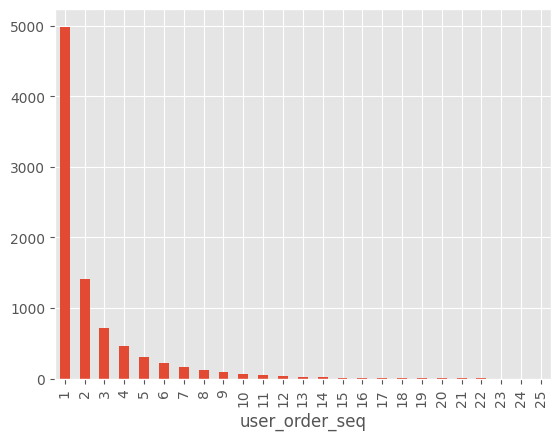

In [155]:
orders['user_order_seq'].value_counts().plot(kind='bar')

<Axes: xlabel='user_order_seq'>

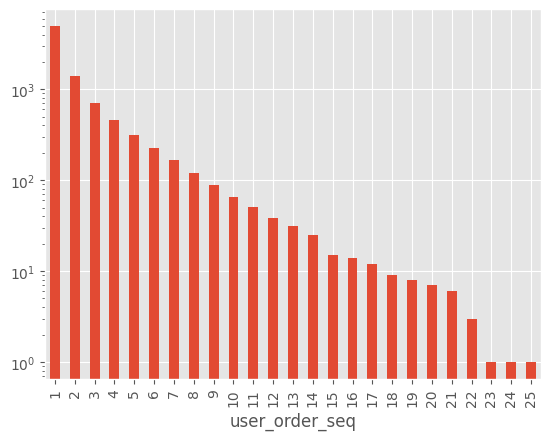

In [156]:
orders['user_order_seq'].value_counts().plot(kind='bar',logy=True)

In [157]:
order_items = orders.explode('ordered_items').rename({'ordered_items': 'variant_id'}, axis=1)

In [158]:
order_items = order_items.merge(inventory, on='variant_id', how='left')

In [159]:
print(f"pct pf missing bought products on inventory: {100*order_items.price.isna().sum() / order_items.shape[0] : .2f}%")

pct pf missing bought products on inventory:  14.45%


In [160]:
order_items.head()

,id,user_id,created_at,order_date,user_order_seq,variant_id,intervalo,hora,cantidad,price,compare_at_price,vendor,product_type,tags
0,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618849693828,2020-04-27,14,14,NaN,NaN,NaN,NaN,NaN
1,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618860179588,2020-04-27,14,14,NaN,NaN,NaN,NaN,NaN
2,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618874040452,2020-04-27,14,14,NaN,NaN,NaN,NaN,NaN
3,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618907005060,2020-04-27,14,14,NaN,NaN,NaN,NaN,NaN
4,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618907005060,2020-04-27,14,14,NaN,NaN,NaN,NaN,NaN


In [161]:
order_items.dropna().head()

,id,user_id,created_at,order_date,user_order_seq,variant_id,intervalo,hora,cantidad,price,compare_at_price,vendor,product_type,tags
70,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,33667238658180,2020-04-27,21,10,4.19,5.10,listerine,dental,[mouthwash]
71,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,33667238658180,2020-04-27,21,10,4.19,5.10,listerine,dental,[mouthwash]
76,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,33667206054020,2020-05-04,11,8,17.99,20.65,ecover,delicates-stain-remover,"[cruelty-free, delicates-stain-remover, eco, v..."
77,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,33667206283396,2020-05-04,11,8,9.99,12.00,ecover,fabric-softener-freshener,"[cruelty-free, eco, fabric-softener-freshener,..."
81,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,39459277602948,2020-05-04,11,8,5.79,5.98,ecloth,cleaning-products,"[eco, sponges-cloths-gloves]"


### Insights
1. Los orders suelen tener en 7-15 items
2. Los usuarios hacen las orders en 8:00-22:00 --> Lo normal. Al ser todos los orders en el mismo pais con el mismo uso horario es normal q las compras se hagan durante el dia.
3. La cantidad de orders ha ido creciendo. La cantidad de de items por orders se ha mantenido bastante parecido desde el inico hasta el final

# EDA

In [5]:
box_builder_sample_data = "/home/hasierza/datos_originales/feature_frame.csv"

bb_df = pd.read_csv(box_builder_sample_data)

bb_df.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [6]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

Esto no sabia muy bien como hacerlo y he mirado el video.


In [7]:
info_cols = ['variant_id', 'order_id', 'user_id', 'created_at', 'order_date']

label_col ='outcome'
features_cols = [col for col in bb_df.columns if col not in info_cols + [label_col]]

categorical_cols = ['product_type', 'vendor']
binary_cols = ['ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular']
numerical_cols =[col for col in features_cols if col not in categorical_cols + binary_cols]

In [8]:
bb_df[label_col].value_counts()

outcome
0.0    2847317
1.0      33232
Name: count, dtype: int64

In [9]:
for col in binary_cols:
    print(f"value counts {col}: {bb_df[col].value_counts().to_dict()}")
    print(f"Mean outcome by {col} value{bb_df.groupby(col)['outcome'].mean().to_dict()}")
    print("---------")

value counts ordered_before: {0.0: 2819658, 1.0: 60891}
Mean outcome by ordered_before value{0.0: 0.008223337723936732, 1.0: 0.1649669080816541}
---------
value counts abandoned_before: {0.0: 2878794, 1.0: 1755}
Mean outcome by abandoned_before value{0.0: 0.011106039542947498, 1.0: 0.717948717948718}
---------
value counts active_snoozed: {0.0: 2873952, 1.0: 6597}
Mean outcome by active_snoozed value{0.0: 0.011302554809544488, 1.0: 0.1135364559648325}
---------
value counts set_as_regular: {0.0: 2870093, 1.0: 10456}
Mean outcome by set_as_regular value{0.0: 0.010668992259135854, 1.0: 0.24971308339709258}
---------


<Axes: >

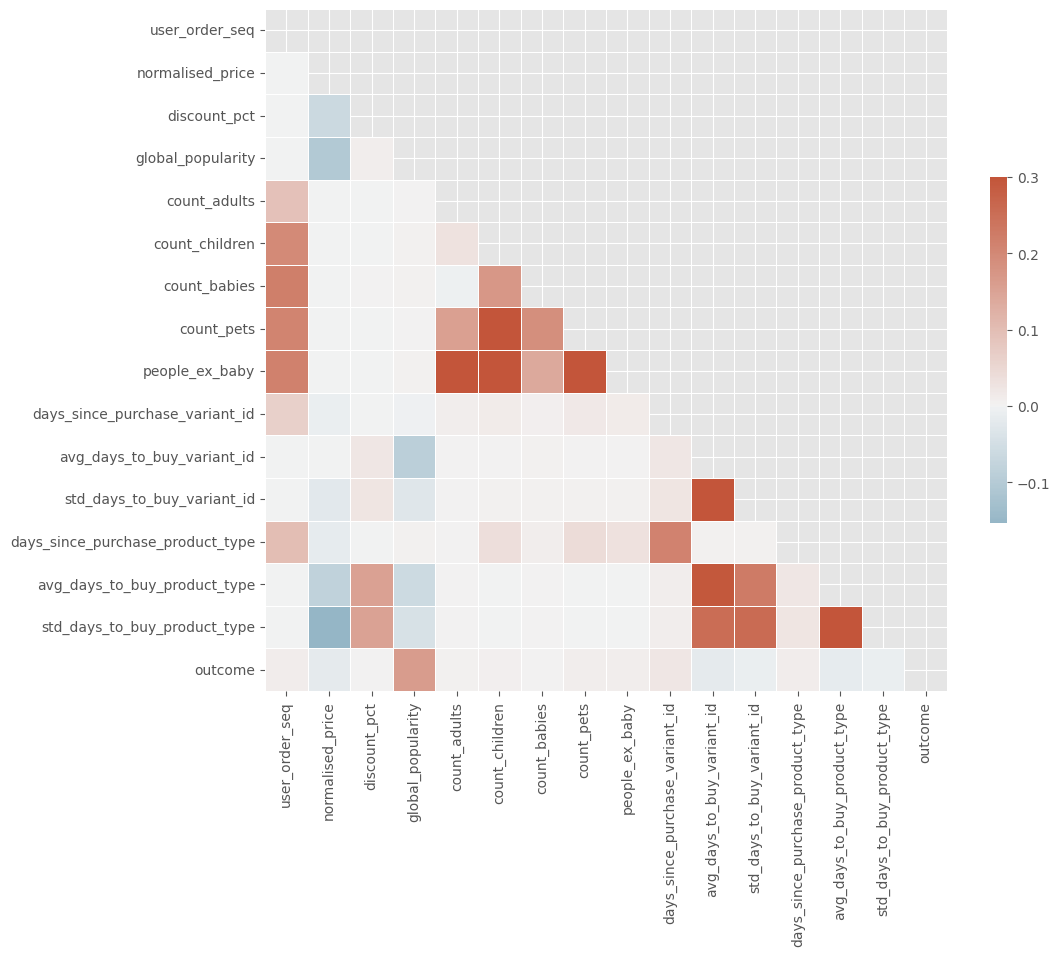

In [10]:
# Calcular la matriz de correlación
corr = bb_df[numerical_cols + [label_col]].corr()

# Generar una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurar la figura de matplotlib
fig, ax = plt.subplots(figsize=(11, 9))

# Generar un mapa de colores divergente personalizado
cmap = nsn.diverging_palette(230, 20, as_cmap=True)

# Dibujar el mapa de calor con la máscara y la proporción de aspecto correcta
nsn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

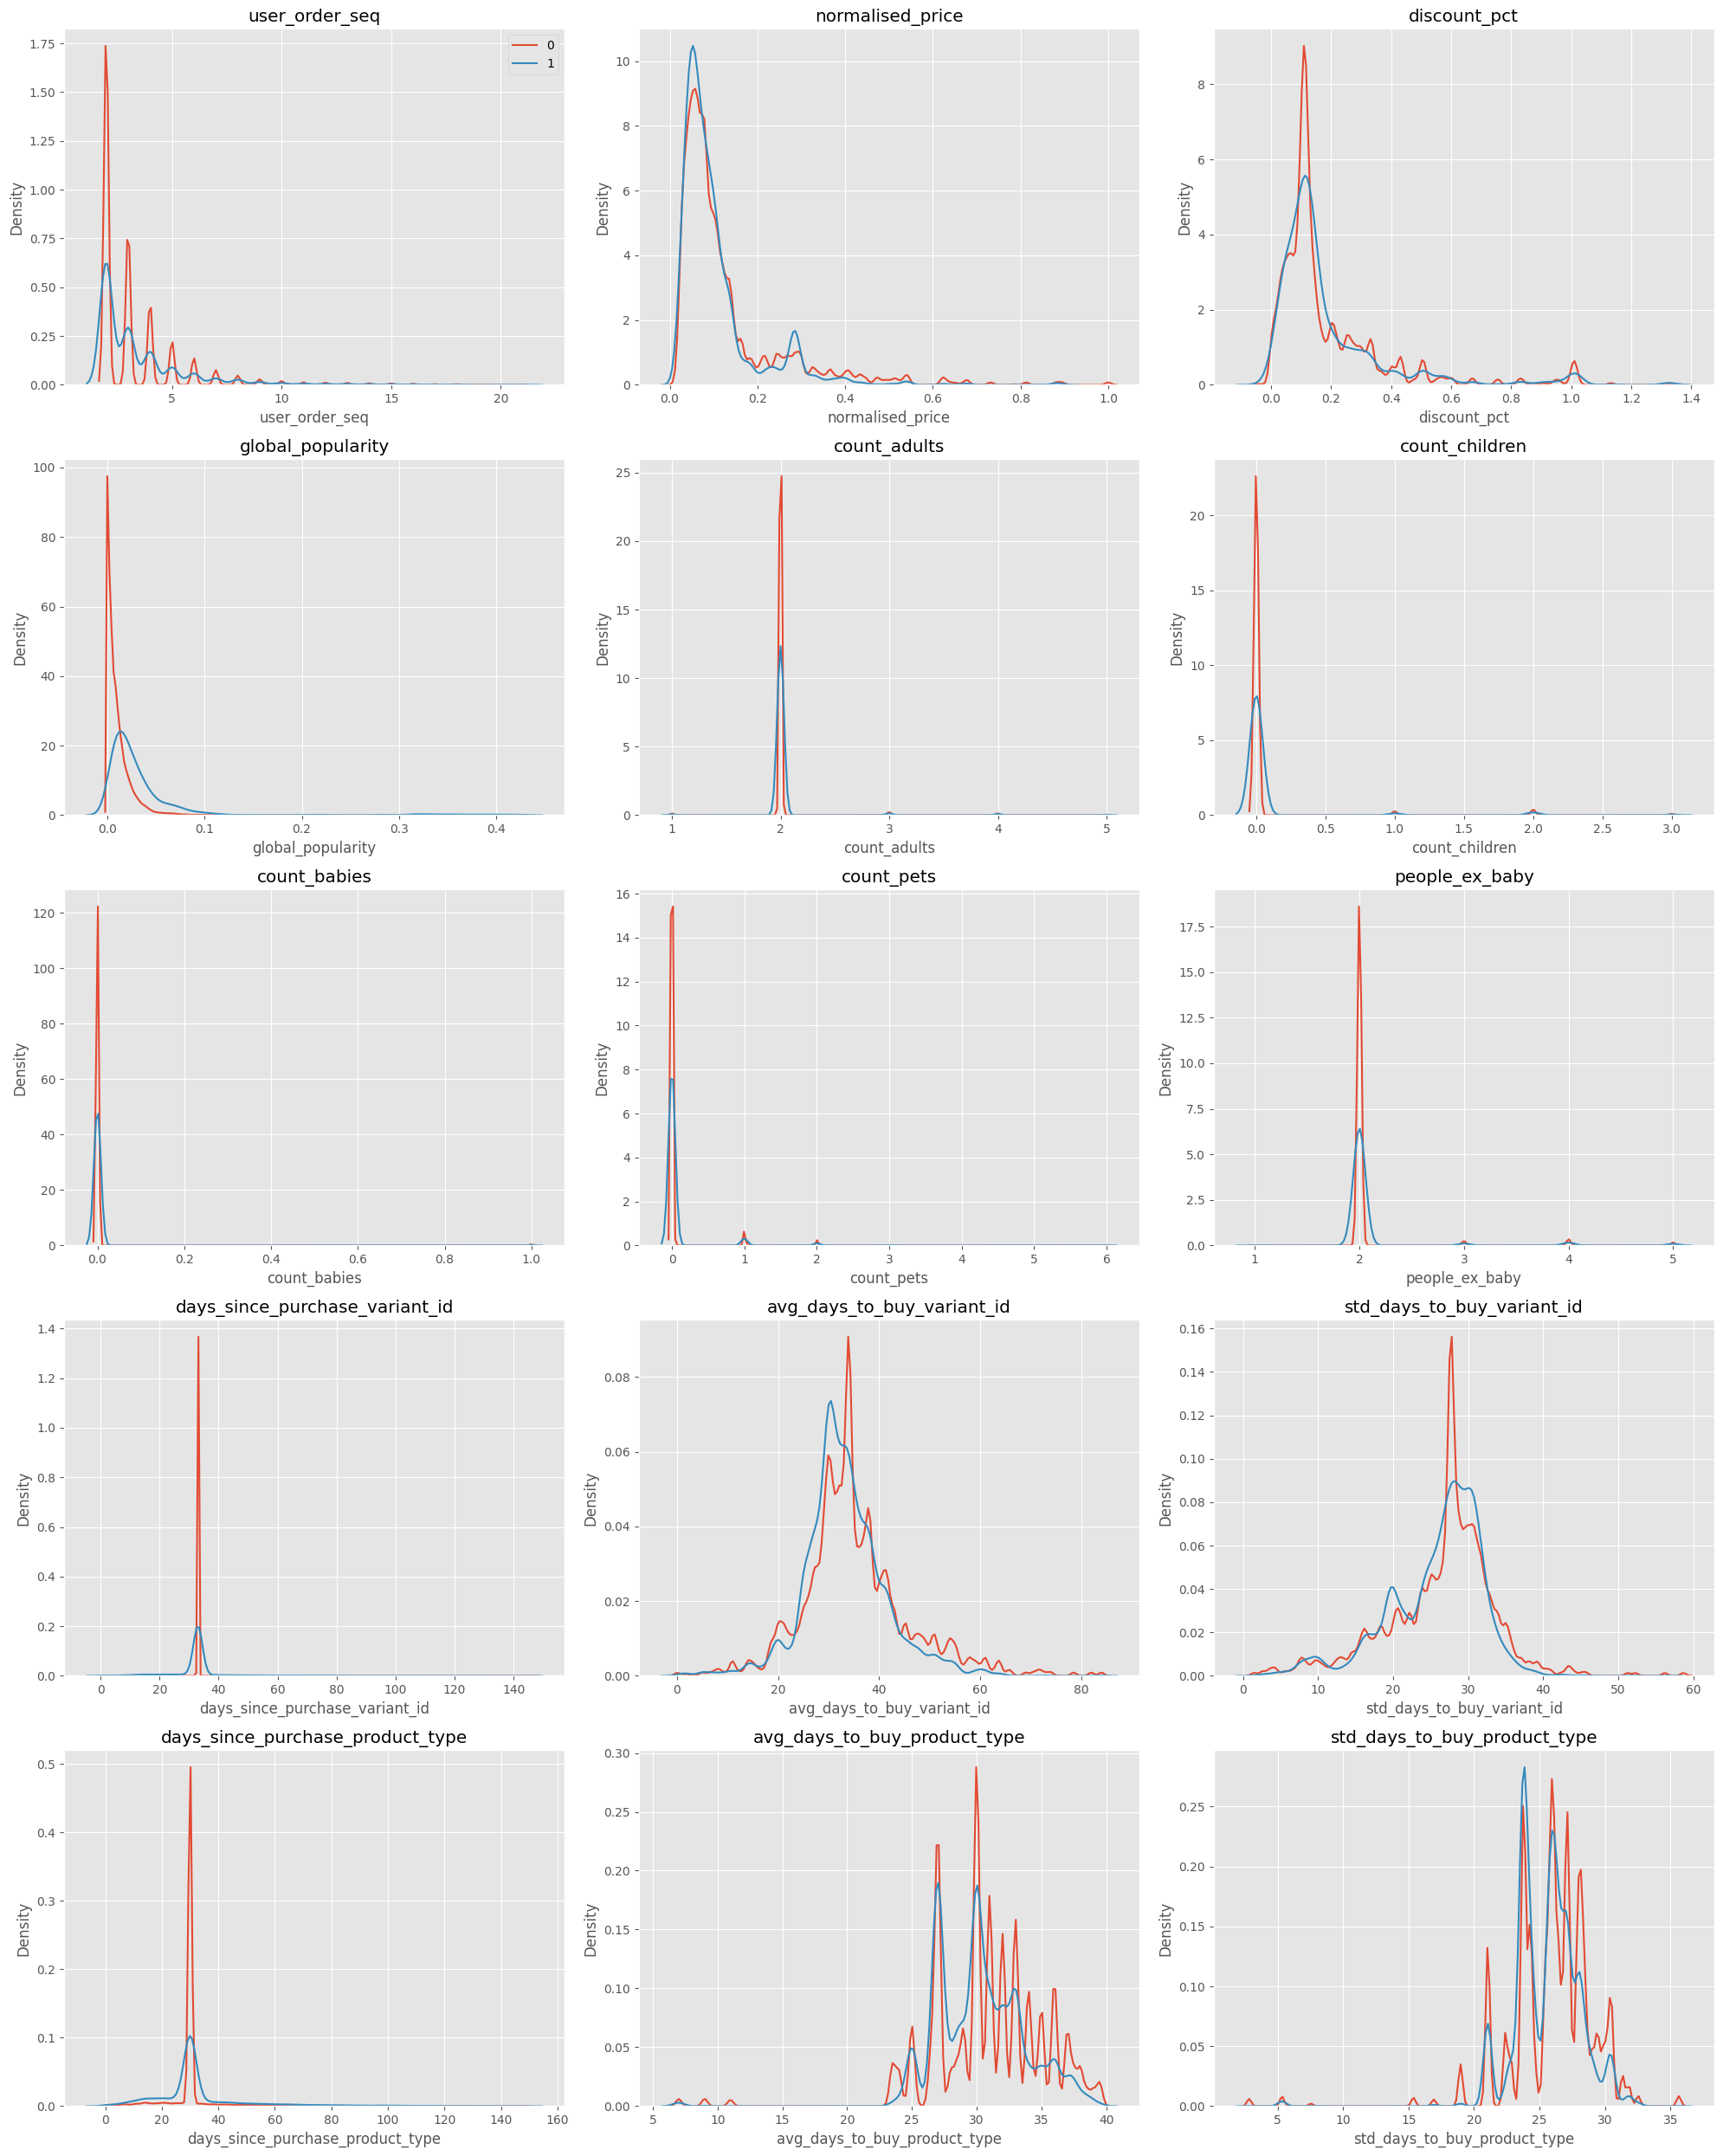

In [11]:
cols = 3
rows = int(np.ceil(len(numerical_cols) / cols))
fig, ax = plt.subplots(rows, cols, figsize=(20, 5 * rows))

ax = ax.flatten()

for i, col in enumerate(numerical_cols):
    nsn.kdeplot(bb_df.loc[bb_df['outcome'] == 0, col], label='0', ax=ax[i])
    nsn.kdeplot(bb_df.loc[bb_df['outcome'] == 1, col], label='1', ax=ax[i])
    ax[i].set_title(col)

ax[0].legend()

plt.tight_layout()

In [12]:
bb_df[categorical_cols].describe()

,product_type,vendor
count,2880549,2880549
unique,62,264
top,tinspackagedfoods,biona
freq,226474,146828
